# GRIP - The Sparks Foundation

## Task-3:  Kmeans 

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans


In [3]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [14]:
#Finding the optimal clusters for K means
scores = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=1)
    kmeans.fit(x)
    scores.append( kmeans.inertia_)
    

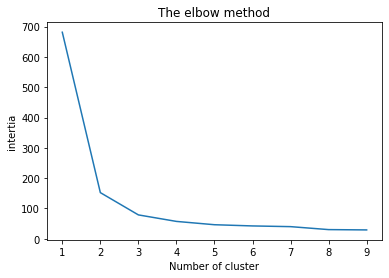

In [20]:
#plotting clusters vs inertia
plt.plot(range(1, 10), scores)
plt.title('The elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('inertia') # Within cluster sum of squares
plt.show()

Models inertia is the mean square distance between each istance and its closest centriod. We can see there is a drop inertia with increase in number of clusters. The optimal number of clusters can be found at the elbow i.e sharp curve at 3. 

In [38]:
#lets try K means clustering with 3 cluster-
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1)
kmeans.fit(x)
y= kmeans.fit_predict(x)

In [40]:
#appending clusters to each row. Now we can know in which cluter each row is in
iris_df['clusters'] = y

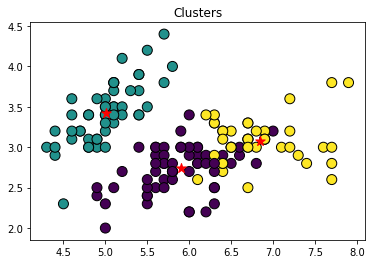

In [88]:
#plotting the first 2 columns and Visualising clusters
l = ['Iris-setosa''Iris-versicolour''Iris-virginica']
plt.scatter(x[:, 0],x[:, 1],c=y, s=100, edgecolor='k', label=l)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids',marker='*')
plt.title('Clusters')
plt.show()

In [105]:
#finding the optimal number of clusters using silhouette score (Confirming our optimal number of clusters)
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    y_predict=kmeans.predict(x)
    silhouette_scores.append(silhouette_score(x,y_predict))
    

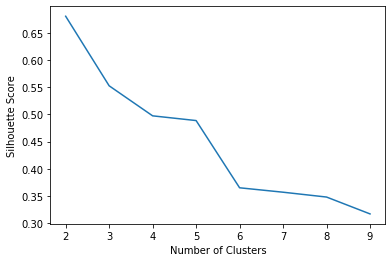

In [107]:
#plotting silhouetee score vs number of clusters 
plt.plot(list(range(2, 10)), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette score ranges from -1 to +1. Any value close to 1 indicates it is close to its cluster and is part of right cluster. From the above graph, it is clear that at 3 there is sharp curve and hence we chose the right number of clusters.